In [47]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
f=open('trades.txt')
for line in f:
    pass

line=line.replace("pd.Timestamp(","")
line=line.replace(")","")
df_trades=pd.DataFrame(json.loads(line))
df_trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [4]:
f=open('quotes.txt')
for line in f:
    pass

line=line.replace("pd.Timestamp(","")
line=line.replace(")","")
df_quotes=pd.DataFrame(json.loads(line))
df_quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [31]:
df=df_trades.merge(df_quotes, on=['time','ticker'], how='outer')
df2=df.groupby(by='ticker').ffill()
df2['ticker']=df['ticker']
df2

,time,price,quantity,bid,ask,ticker
0,2016-05-25 13:30:00.023,51.95,75.0,51.95,51.96,MSFT
1,2016-05-25 13:30:00.038,51.95,155.0,51.95,51.96,MSFT
2,2016-05-25 13:30:00.048,720.77,100.0,720.50,720.93,GOOG
3,2016-05-25 13:30:00.048,720.92,100.0,720.50,720.93,GOOG
4,2016-05-25 13:30:00.048,98.00,100.0,NaN,NaN,AAPL
5,2016-05-25 13:30:00.023,720.92,100.0,720.50,720.93,GOOG
6,2016-05-25 13:30:00.030,51.95,155.0,51.97,51.98,MSFT
7,2016-05-25 13:30:00.041,51.95,155.0,51.99,52.00,MSFT
8,2016-05-25 13:30:00.049,98.00,100.0,97.99,98.01,AAPL
9,2016-05-25 13:30:00.072,720.92,100.0,720.50,720.88,GOOG


In [36]:
df_trades.merge(df2, on=['time','ticker','price','quantity'],how='left')

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.95,51.96
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [33]:
df_trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [34]:
df2

,time,price,quantity,bid,ask,ticker
0,2016-05-25 13:30:00.023,51.95,75.0,51.95,51.96,MSFT
1,2016-05-25 13:30:00.038,51.95,155.0,51.95,51.96,MSFT
2,2016-05-25 13:30:00.048,720.77,100.0,720.50,720.93,GOOG
3,2016-05-25 13:30:00.048,720.92,100.0,720.50,720.93,GOOG
4,2016-05-25 13:30:00.048,98.00,100.0,NaN,NaN,AAPL
5,2016-05-25 13:30:00.023,720.92,100.0,720.50,720.93,GOOG
6,2016-05-25 13:30:00.030,51.95,155.0,51.97,51.98,MSFT
7,2016-05-25 13:30:00.041,51.95,155.0,51.99,52.00,MSFT
8,2016-05-25 13:30:00.049,98.00,100.0,97.99,98.01,AAPL
9,2016-05-25 13:30:00.072,720.92,100.0,720.50,720.88,GOOG


In [37]:
def f(n):
    if n<=0:
        return 0
    else:
        return 1 + (f(n-1)+f(n-2)+f(n-3)+f(n-4)+f(n-5)+f(n-6))

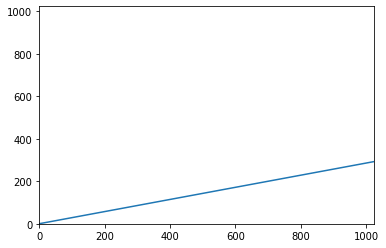

In [57]:
N=1024
f=np.zeros(N)
f[0]=0
f[1]=1
f[2]=1 +(f[1]+f[0])/6
f[3]=1 +(f[2]+f[1]+f[0])/6
f[4]=1 +(f[3]+f[2]+f[1]+f[0])/6
f[5]=1 +(f[4]+f[3]+f[2]+f[1]+f[0])/6
f[6]=1 +(f[5]+f[4]+f[3]+f[2]+f[1]+f[0])/6
for i in range(7,N):
    f[i]=1 +(f[i-1]+f[i-2]+f[i-3]+f[i-4]+f[i-5]+f[i-6])/6
    
plt.plot(np.arange(N),f)
plt.xlim([0, N])
plt.ylim([0, N])
plt.show()